In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'Position_Salaries.csv')
df=pd.DataFrame(data)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [6]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [7]:
x
x.shape
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [9]:
y=y.reshape((len(y),1))
y.shape

(10, 1)

In [10]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
y=sc_y.fit_transform(y)
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [12]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')

In [13]:
regressor.fit(x,y)

c:\Users\Gyanender\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [14]:
y_predict=regressor.predict(sc_x.transform([[6.5]]))

In [15]:
y_predict

array([-0.27861589])

In [16]:
sc_y.inverse_transform([y_predict])

array([[170370.0204065]])

In [17]:
y_predictlist=[]
for i in x:
    res=regressor.predict(sc_x.transform([i]))
    y_predictlist.append(res)

print(y_predictlist)

[array([-0.2421045]), array([-0.30078456]), array([-0.3625491]), array([-0.42451604]), array([-0.48342382]), array([-0.53598455]), array([-0.579279]), array([-0.61112552]), array([-0.63035603]), array([-0.63694919])]


Text(0, 0.5, 'Salary (Log)')

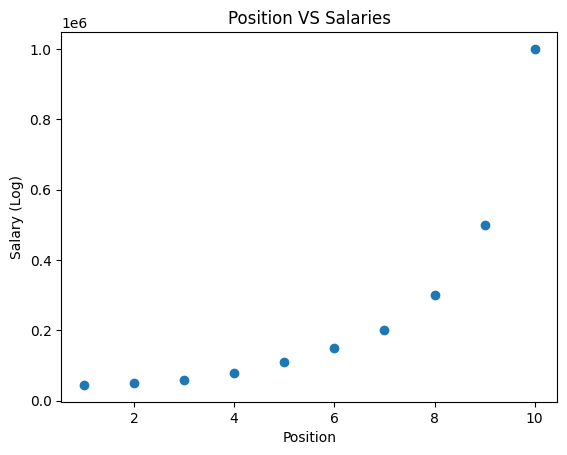

In [24]:
plt.scatter(df['Level'],df['Salary'])
plt.title("Position VS Salaries")
plt.xlabel("Position")
plt.ylabel("Salary (Log)")
